<a href="https://www.kaggle.com/code/yasashkurukuti/heart1?scriptVersionId=100974675" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('Successfully imported')

Successfully imported


In [3]:
train = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
train.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
train.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [6]:
train.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
train.shape

(918, 12)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<AxesSubplot:xlabel='Sex', ylabel='count'>

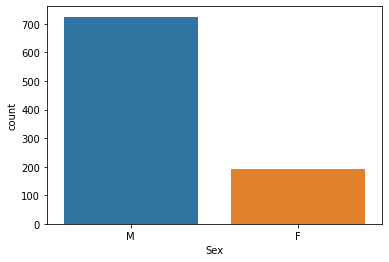

In [9]:
train['Sex'].value_counts()
sns.countplot(x=train.Sex)

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

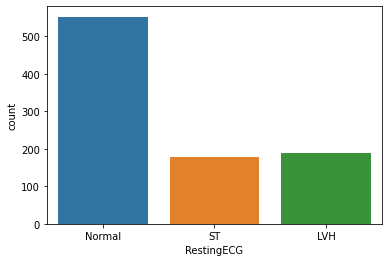

In [10]:
train['RestingECG'].value_counts()
sns.countplot(x=train.RestingECG)

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

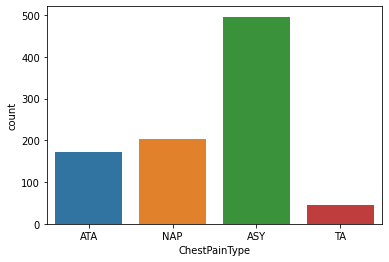

In [11]:
train['ChestPainType'].value_counts()
sns.countplot(x=train.ChestPainType)

<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

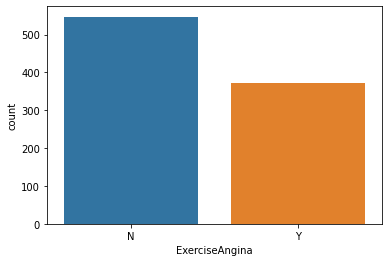

In [12]:
train['ExerciseAngina'].value_counts()
sns.countplot(x=train.ExerciseAngina)


<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

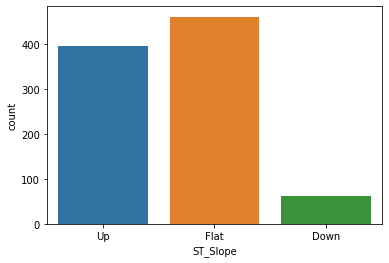

In [13]:
train['ST_Slope'].value_counts()
sns.countplot(x = train.ST_Slope)
### DATA VISUALIZATION ENDS


In [14]:
train.isnull().sum()
## No NULL values present in the data set

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [15]:
## CONVERTING ALL THE OBJ TYPES INTO INT OR FLOAT
train.Sex = train.Sex.map({'F': 0, 'M':1})
train.ChestPainType = train.ChestPainType.map({'ATA':0,'NAP':1,'ASY':2,'TA':3})
train.RestingECG = train.RestingECG.map({'Normal':0,'ST':1, 'LVH':2})
train.ExerciseAngina = train.ExerciseAngina.map({'N':0,'Y':1})
train.ST_Slope = train.ST_Slope.map({'Up':0,'Flat':1,'Down':2})

In [16]:
y = train.pop('HeartDisease')
X = train
y.head(10)



0    0
1    1
2    0
3    1
4    0
5    0
6    0
7    0
8    1
9    0
Name: HeartDisease, dtype: int64

In [17]:
X.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,0,140,289,0,0,172,0,0.0,0
1,49,0,1,160,180,0,0,156,0,1.0,1
2,37,1,0,130,283,0,1,98,0,0.0,0
3,48,0,2,138,214,0,0,108,1,1.5,1
4,54,1,1,150,195,0,0,122,0,0.0,0
5,39,1,1,120,339,0,0,170,0,0.0,0
6,45,0,0,130,237,0,0,170,0,0.0,0
7,54,1,0,110,208,0,0,142,0,0.0,0
8,37,1,2,140,207,0,0,130,1,1.5,1
9,48,0,0,120,284,0,0,120,0,0.0,0


In [18]:
X.RestingBP = (X.RestingBP-min(X.RestingBP))/(max(X.RestingBP)-min(X.RestingBP))
X.Cholesterol = (X.Cholesterol -min(X.Cholesterol))/(max(X.Cholesterol)-min(X.Cholesterol))
X.MaxHR = (X.MaxHR -min(X.MaxHR))/(max(X.MaxHR)-min(X.MaxHR))
X.Age = (X.Age -min(X.Age))/(max(X.Age)-min(X.Age))

In [19]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,1,0,0.70,0.479270,0,0,0.788732,0,0.0,0
1,0.428571,0,1,0.80,0.298507,0,0,0.676056,0,1.0,1
2,0.183673,1,0,0.65,0.469320,0,1,0.267606,0,0.0,0
3,0.408163,0,2,0.69,0.354892,0,0,0.338028,1,1.5,1
4,0.530612,1,1,0.75,0.323383,0,0,0.436620,0,0.0,0


In [20]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size = 0.19
                                                  ,random_state = 1)

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
Heart_model = SVC(C= .1, kernel='linear', gamma= 1)


Heart_model.fit(train_X,train_y)
Heart_pred = Heart_model.predict(val_X)
print(mean_absolute_error(val_y, Heart_pred))
print(accuracy_score(val_y,Heart_pred))

0.09714285714285714
0.9028571428571428


In [22]:
print("Confusion Matrix:\n",confusion_matrix(Heart_pred,val_y))

Confusion Matrix:
 [[60  8]
 [ 9 98]]


In [23]:
print(val_y)

900    1
570    1
791    1
189    1
372    1
      ..
766    0
838    1
244    1
598    1
521    1
Name: HeartDisease, Length: 175, dtype: int64
